# Análise Exploratória de Dados


In [1]:
%matplotlib inline
import os
import conda
os.environ['USE_PYGEOS'] = '0'
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [19]:
import geopandas as gpd
import pandas as pd

df = pd.read_csv("../dados/house_bh.csv", encoding='latin1')
#imoveis.rename(inplace=True, columns={"postgis_fi":"gid", "lat_y_dd":"latitude", "long_x_dd":"longitude"})
df

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua EspÃ­rito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos ExpedicionÃ¡rios, 1082",NaN,5,1190000.0,4,411,Santa AmÃ©lia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
...,...,...,...,...,...,...,...,...,...,...
5976,Rua Gama Cerqueira,340.0,2,560000.0,3,92,Nova SuÃ­ssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur LourenÃ§o, 262",200.0,1,440000.0,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General EphigÃªnio Ruas Santos,10.0,2,500000.0,3,80,ItapoÃ£,Belo Horizonte,-19.840904,-43.956037
5979,Rua General EphigÃªnio Ruas Santos,10.0,2,740000.0,3,80,ItapoÃ£,Belo Horizonte,-19.840904,-43.956037


In [26]:
df["adm-fees"] = df["adm-fees"].fillna(0)

In [30]:
df = df.dropna(subset=["price", "neighborhood"])

In [31]:
df.isnull().sum()

address          0
adm-fees         0
garage-places    0
price            0
rooms            0
square-foot      0
neighborhood     0
city             0
latitude         0
longitude        0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5141 entries, 0 to 5979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        5141 non-null   object 
 1   adm-fees       5141 non-null   int64  
 2   garage-places  5141 non-null   int64  
 3   price          5141 non-null   float64
 4   rooms          5141 non-null   int64  
 5   square-foot    5141 non-null   int64  
 6   neighborhood   5141 non-null   object 
 7   city           5141 non-null   object 
 8   latitude       5141 non-null   float64
 9   longitude      5141 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 441.8+ KB


In [35]:
df.loc[:, ["adm-fees", "garage-places", "rooms", "square-foot"]] =  df.loc[
    :, 
    ["adm-fees", "garage-places", "rooms", "square-foot"]
].astype("int64")

/tmp/ipykernel_5659/2843036479.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, ["adm-fees", "garage-places", "rooms", "square-foot"]] =  df.loc[


In [34]:
df = df[
    (~df["rooms"].str.contains('-'))
    & (~df["square-foot"].str.contains('-'))
    & (~df["garage-places"].str.contains('-'))
]

In [47]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

In [48]:
gdf

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude,geometry
0,"Avenida Raja Gabaglia, 1583",470,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396,POINT (-43.95340 -19.93642)
2,"Rua dos ExpedicionÃ¡rios, 1082",0,5,1190000.0,4,411,Santa AmÃ©lia,Belo Horizonte,-20.225241,-44.397780,POINT (-44.39778 -20.22524)
3,"Rua Marechal Hermes, 81",750,4,1590000.0,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694,POINT (-43.95869 -19.93716)
4,"Rua Juruna, 110",0,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944,POINT (-44.01994 -19.91298)
5,"Rua Maria Pereira de AraÃºjo, 15",500,1,450000.0,3,87,Castelo,Belo Horizonte,-19.886147,-44.004236,POINT (-44.00424 -19.88615)
...,...,...,...,...,...,...,...,...,...,...,...
5974,Rua ItararÃ©,260,1,330000.0,3,117,ConcÃ³rdia,Belo Horizonte,-19.900818,-43.940104,POINT (-43.94010 -19.90082)
5976,Rua Gama Cerqueira,340,2,560000.0,3,92,Nova SuÃ­ssa,Belo Horizonte,-19.945428,-43.970988,POINT (-43.97099 -19.94543)
5977,"Rua Arthur LourenÃ§o, 262",200,1,440000.0,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007,POINT (-44.02601 -19.97991)
5978,Rua General EphigÃªnio Ruas Santos,10,2,500000.0,3,80,ItapoÃ£,Belo Horizonte,-19.840904,-43.956037,POINT (-43.95604 -19.84090)


<Axes: >

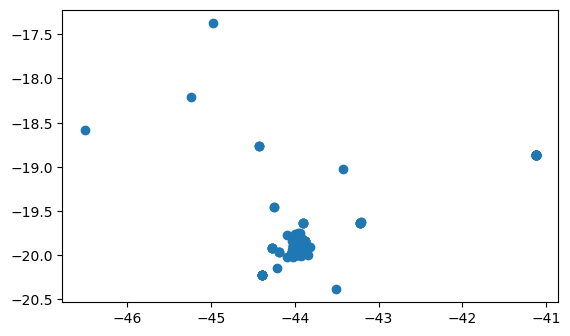

In [49]:
gdf.plot()

In [51]:
gdf.to_file('../dados/imoveis_bh.shp') 

/tmp/ipykernel_5659/671920812.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('../dados/imoveis_bh.shp')


<Axes: >

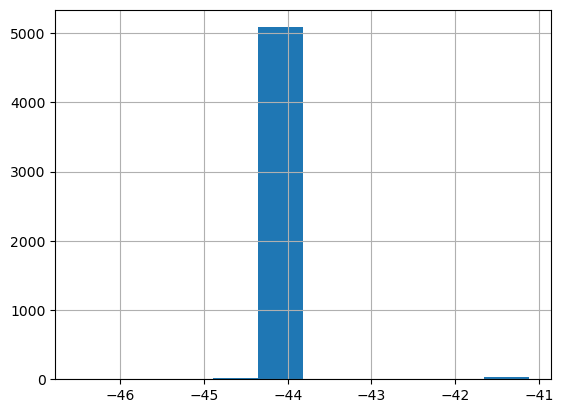

In [38]:
df['longitude'].hist()

In [39]:
df.hist(column = 'latitude', by='recentstat', legend=True, bins=30, figsize=(15,15), color='red')

KeyError: 'recentstat'

We can also use the bloxplot method to see boxplots for numerical data partitioned by a categorical value as follows

In [40]:
df.boxplot(column='latitude', by='recentstat')

KeyError: 'recentstat'

Of course, if we just use the plot method on a GeoDataFrame the output will be a map of the geometry column by default.

<Axes: >

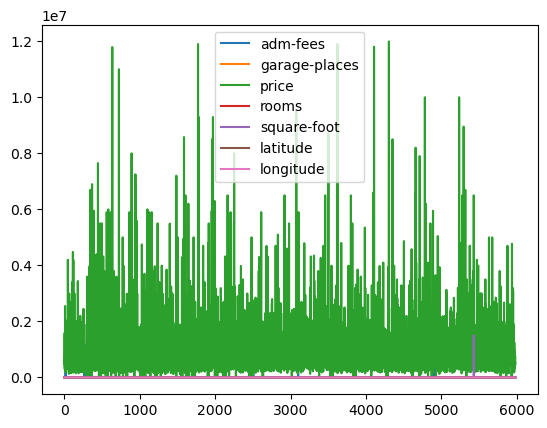

In [41]:
df.plot()

but we can also call some of the Pandas plotting method on a single Pandas data series.

<Axes: >

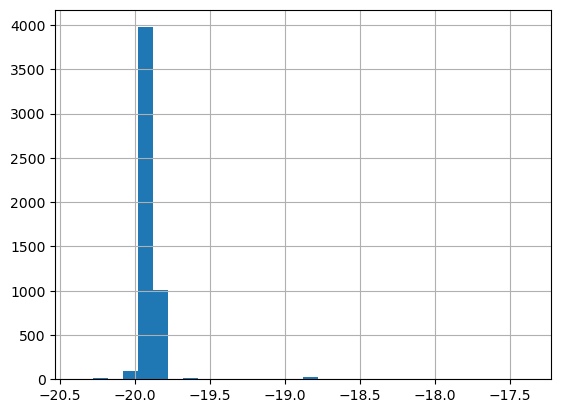

In [42]:
df['latitude'].hist(bins=30)

The plot method on a non-geometry dataseries returns a line graph, with the index values on the x axis.

<Axes: >

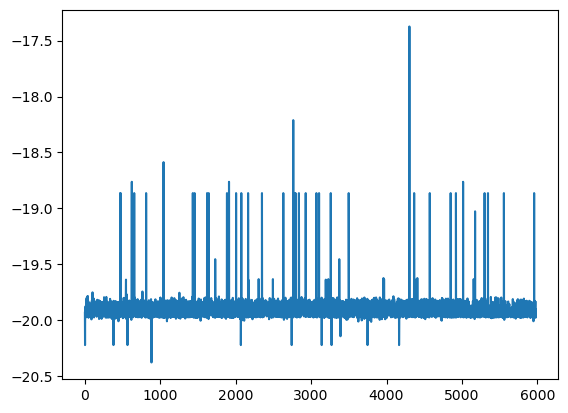

In [43]:
df['latitude'].plot()

If you want to use pandas plotting methods on your tabular data you can easily reduce the GeoDataFrame to a normal Pandas DataFrame simply by subsetting the dataframe by column and not including the geometry field.

In this example we create a scatterplot of longitude and latitude which presents a similar output to the GeoPandas plot method although the scaling of the axes is not guaranteed to be equal

<Axes: xlabel='longitude', ylabel='latitude'>

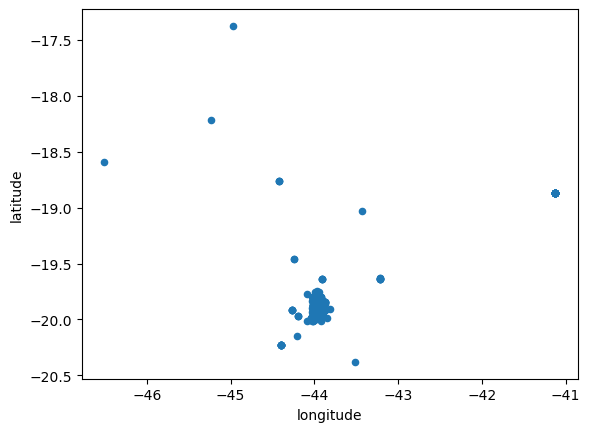

In [45]:
df[['longitude', 'latitude']].plot.scatter(x='longitude', y='latitude')

For some plots you will need to summarize the dataframe. In this example we summarize the raptor data by the recentstat category and use the count aggregator to create a new dataset that is appropriate to use with a pie chart.

In [46]:
stat_count = df[['longitude', 'recentstat']].groupby('recentstat').agg('count')
stat_count

KeyError: "['recentstat'] not in index"

In [ ]:
stat_count.plot.pie(y='longitude')

This same data coud be used in a bar chart

In [ ]:
stat_count.plot.bar(y='longitude')

Hopefully this provides you with a starting point for exploratory data analysis with Pandas and GeoPandas.  There could certainly be a lot more coverage of this topic.

Keep in mind that Pandas and GeoPandas are using matplotlib in the background for plotting.  Although the syntax in Pandas is simpler in my opinion, using matplotlib directly is also possible and provides a stunning amount of flexibility.

Other data vizualization libraries you can use with GeoPandas include Seaborn which also uses matplotlib in the background but adds some nice functionality with simpler syntax.  Plotly is another package for vizualizations but Plotly provides interactive charts that allow you to see actual data values when hovering the mouse over the chart, zoom in or out,  and much more.